In [1]:
import os
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RESULTS_DIR = './results'
NUMBER_OF_IMAGES = 40
NUMBER_OF_ITERATIONS = 1

In [3]:
# for file in os.listdir('results'):
#     if file.endswith('.txt'):
#         os.remove(f'results/{file}')

In [8]:
scripts = ['./ffmpeg.sh', './graphicsmagick.sh', './imagemagick.sh', './libvips.sh', './pillow.py', './opencv.py']

for script in scripts:
    for _ in range(NUMBER_OF_ITERATIONS):
        # get the file extension
        _, ext = os.path.splitext(script)
        # run python files with python3
        if ext == '.py':
            subprocess.run(['python3', script])
        # run shell scripts directly
        elif ext == '.sh':
            subprocess.run(['bash', '-c', script])

./images/output/01-crop.jpg 0.02759949999745004
./images/output/02-crop.jpg 0.02518058300483972
./images/output/03-crop.jpg 0.02916195800935384
./images/output/04-crop.jpg 0.017050082999048755
./images/output/05-crop.jpg 0.025956833007512614
./images/output/06-crop.jpg 0.026155291008763015
./images/output/07-crop.jpg 0.02679862499644514
./images/output/08-crop.jpg 0.0295527919952292
./images/output/09-crop.jpg 0.00916879199212417
./images/output/10-crop.jpg 0.009254083008272573
./images/output/11-crop.jpg 0.11073629099701066
./images/output/12-crop.jpg 0.05655437499808613
./images/output/13-crop.jpg 0.15142120901145972
./images/output/14-crop.jpg 0.1316754160070559
./images/output/15-crop.jpg 0.10120345899485983
./images/output/16-crop.jpg 0.08925091700803023
./images/output/17-crop.jpg 0.11980783299077302
./images/output/18-crop.jpg 0.076825916999951
./images/output/19-crop.jpg 0.12047883300692774
./images/output/20-crop.jpg 0.14290162500401493
./images/output/21-crop.png 0.3739694999

In [9]:
tool_results = {}

# List all files in the results directory
files = os.listdir(RESULTS_DIR)

# Read each file and extract the time values for each operation
for file in files:
    file_path = os.path.join(RESULTS_DIR, file)
    tool_name = os.path.splitext(file)[0]
    if 'readme' in tool_name:
        continue

    tool_name = tool_name.replace('-results', '')
    tool_results[tool_name] = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

        crop_times = [float(time) for time in lines[:NUMBER_OF_IMAGES]]
        compress_times = [float(time) for time in lines[NUMBER_OF_IMAGES:2 * NUMBER_OF_IMAGES]]
        resize_times = [float(time) for time in lines[2 * NUMBER_OF_IMAGES:3 * NUMBER_OF_IMAGES]]
        convert_times = [float(time) for time in lines[3 * NUMBER_OF_IMAGES:4 * NUMBER_OF_IMAGES]]

        tool_results[tool_name]['crop'] = crop_times
        tool_results[tool_name]['compress'] = compress_times
        tool_results[tool_name]['resize'] = resize_times
        tool_results[tool_name]['convert'] = convert_times

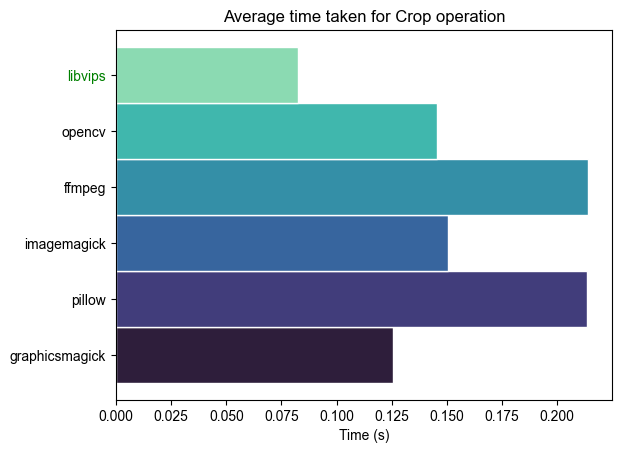

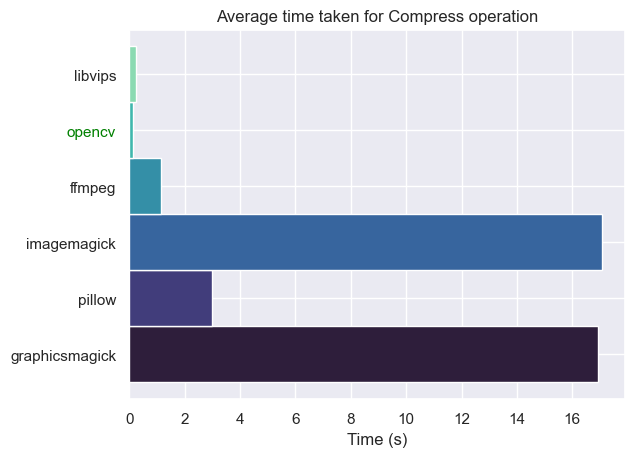

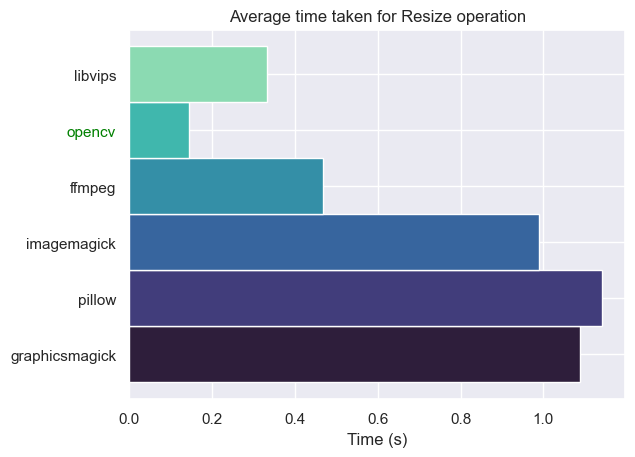

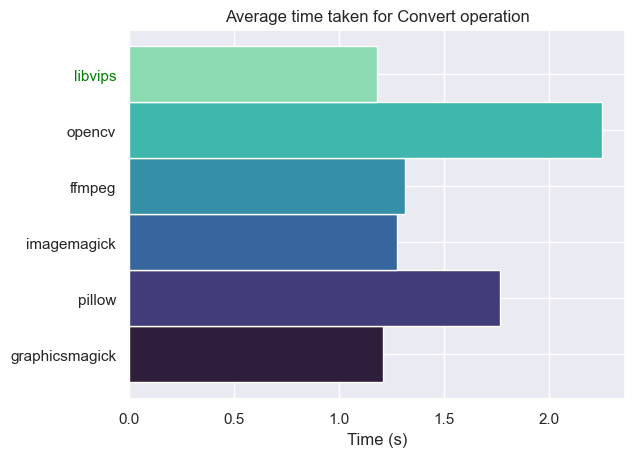

In [10]:
# create separate plots for each operation
operations = ['crop', 'compress', 'resize', 'convert']
for operation in operations:
    fig, ax = plt.subplots()
    bar_width = 1
    index = range(len(tool_results))
    sns.set()
    colors = sns.color_palette('mako', len(tool_results))
    times = [(tool, sum(results[operation]) / NUMBER_OF_IMAGES) for tool, results in tool_results.items()]
    min_time_tool, min_time = min(times, key=lambda item: item[1])
    for i, (tool, results) in enumerate(tool_results.items()):
        time = sum(results[operation]) / NUMBER_OF_IMAGES
        ax.barh(i, time, bar_width, label=tool, color=colors[i])

    ax.set_xlabel('Time (s)')
    ax.set_title(f'Average time taken for {operation.capitalize()} operation')
    ax.set_yticks(index)
    yticklabels = ax.set_yticklabels(tool_results.keys())

    # change the color of the y-tick label that corresponds to the tool with the lowest time
    for label in yticklabels:
        if label.get_text() == min_time_tool:
            label.set_color('green')

    plt.show()